**оценка классификатора**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
print( list(data.keys()) )

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']


In [3]:
print( data['DESCR'] )

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

---

In [4]:
X = data['data']
y = data['target']

X.shape, y.shape

((178, 13), (178,))

In [5]:
# объединяем второй и третий класс, 
# сводим задачу к бинарной классификации
# для упрощения анализа результатов
y = np.array([ min(c,1) for c in y ])

---

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.8)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35, 13), (35,), (143, 13), (143,))

In [7]:
%xdel X
%xdel y
%xdel data

---

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
# KNeighborsClassifier?

In [10]:
clf = KNeighborsClassifier(metric='euclidean')
clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [11]:
r = clf.predict(X_test)

In [12]:
from sklearn.metrics import  accuracy_score

# доля правильных ответов на тестовом наборе 
accuracy_score(y_test,r)

0.9020979020979021

In [13]:
from sklearn.metrics import classification_report

# таблица метрик качества классификации на тестовом наборе
print( classification_report(y_test,r) )

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        43
           1       0.94      0.92      0.93       100

    accuracy                           0.90       143
   macro avg       0.88      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143



In [14]:
# количество объектов в классах
len(y_test), (y_test>0).sum() , (y_test<1).sum() 

(143, 100, 43)

In [15]:
from sklearn.metrics import confusion_matrix

# матрица ошибок
cm = confusion_matrix(y_test,r)
print(cm)

[[37  6]
 [ 8 92]]


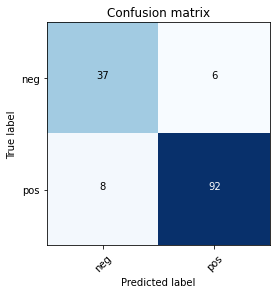

In [16]:
import itertools

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion matrix')
classes=['neg','pos']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [17]:
# оценка принадлежности к классу (score)
p = clf.predict_proba(X_test)
p

array([[0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. ,

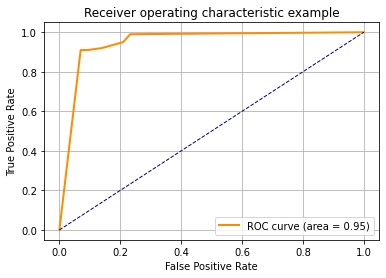

In [18]:
# рисуем ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve( y_test, p[:,1] )
roc_auc = auc(fpr,tpr)

plt.figure()
plt.grid(True)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()